In [187]:
import pandas as pd
import numpy as np
import csv
import sklearn
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import model_selection 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit, KFold
from sklearn import linear_model
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score 
from numpy import std
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import NearMiss
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn. feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import precision_recall_fscore_support
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor


# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [188]:
 ########## Data Loading ########
 df = pd.read_csv('/content/drive/MyDrive/AdvertData/AdvertData.csv')
 df

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,2.020000e+14,0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,2.020000e+14,108230,61.0,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,2.020000e+14,7800,17.0,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,2.020000e+14,45000,16.0,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,2.020000e+14,64000,64.0,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2.020000e+14,122675,15.0,Grey,Mercedes-Benz,C Class,USED,2015.0,13200,Saloon,False,Diesel Hybrid
1996,2.020000e+14,70000,17.0,Black,Vauxhall,Insignia,USED,2017.0,10989,Hatchback,False,Diesel
1997,2.020000e+14,65303,53.0,Silver,Porsche,Boxster,USED,2003.0,8750,Convertible,False,Petrol
1998,2.020000e+14,72178,64.0,Brown,Vauxhall,Zafira Tourer,USED,2014.0,6600,MPV,False,Diesel


In [189]:
#####Display first 5 rows of dataset ####
df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,2.020000e+14,0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,2.020000e+14,108230,61.0,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,2.020000e+14,7800,17.0,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,2.020000e+14,45000,16.0,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,2.020000e+14,64000,64.0,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [190]:
#####Broader Picture of Dataset ####
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   public_reference       2000 non-null   float64
 1   mileage                2000 non-null   int64  
 2   reg_code               1847 non-null   float64
 3   standard_colour        1980 non-null   object 
 4   standard_make          2000 non-null   object 
 5   standard_model         2000 non-null   object 
 6   vehicle_condition      2000 non-null   object 
 7   year_of_registration   1860 non-null   float64
 8   price                  2000 non-null   int64  
 9   body_type              1995 non-null   object 
 10  crossover_car_and_van  2000 non-null   bool   
 11  fuel_type              1999 non-null   object 
dtypes: bool(1), float64(3), int64(2), object(6)
memory usage: 174.0+ KB


In [191]:
###Dataset Shape###
df.shape

(2000, 12)

In [192]:
#### Check Null Values ###
df.isnull().sum()

public_reference           0
mileage                    0
reg_code                 153
standard_colour           20
standard_make              0
standard_model             0
vehicle_condition          0
year_of_registration     140
price                      0
body_type                  5
crossover_car_and_van      0
fuel_type                  1
dtype: int64

In [193]:
 #Replacing the missing value by the median of the Reg_code column and Year of Registration
df['reg_code'] = df['reg_code'].fillna(df['reg_code'].median())
df['year_of_registration'] = df['year_of_registration'].fillna(df['year_of_registration'].median())
df

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,2.020000e+14,0,20.0,Grey,Volvo,XC90,NEW,2016.0,73970,SUV,False,Petrol Plug-in Hybrid
1,2.020000e+14,108230,61.0,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,2.020000e+14,7800,17.0,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,2.020000e+14,45000,16.0,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,2.020000e+14,64000,64.0,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2.020000e+14,122675,15.0,Grey,Mercedes-Benz,C Class,USED,2015.0,13200,Saloon,False,Diesel Hybrid
1996,2.020000e+14,70000,17.0,Black,Vauxhall,Insignia,USED,2017.0,10989,Hatchback,False,Diesel
1997,2.020000e+14,65303,53.0,Silver,Porsche,Boxster,USED,2003.0,8750,Convertible,False,Petrol
1998,2.020000e+14,72178,64.0,Brown,Vauxhall,Zafira Tourer,USED,2014.0,6600,MPV,False,Diesel


In [194]:
##### Remove rows having numeric values in categorical columns ######
dfnew = df[~df['standard_model'].str.contains('\d+')]
dfnew 

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
1,2.020000e+14,108230,61.0,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,2.020000e+14,7800,17.0,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,2.020000e+14,45000,16.0,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,2.020000e+14,64000,64.0,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel
6,2.020000e+14,24075,17.0,Red,Vauxhall,Viva,USED,2017.0,5861,Hatchback,False,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2.020000e+14,122675,15.0,Grey,Mercedes-Benz,C Class,USED,2015.0,13200,Saloon,False,Diesel Hybrid
1996,2.020000e+14,70000,17.0,Black,Vauxhall,Insignia,USED,2017.0,10989,Hatchback,False,Diesel
1997,2.020000e+14,65303,53.0,Silver,Porsche,Boxster,USED,2003.0,8750,Convertible,False,Petrol
1998,2.020000e+14,72178,64.0,Brown,Vauxhall,Zafira Tourer,USED,2014.0,6600,MPV,False,Diesel


In [195]:
####Remove Empty Rows ####
df_final = dfnew.dropna(how='any',axis=0) 
df_final

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
1,2.020000e+14,108230,61.0,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,2.020000e+14,7800,17.0,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,2.020000e+14,45000,16.0,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,2.020000e+14,64000,64.0,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel
6,2.020000e+14,24075,17.0,Red,Vauxhall,Viva,USED,2017.0,5861,Hatchback,False,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2.020000e+14,122675,15.0,Grey,Mercedes-Benz,C Class,USED,2015.0,13200,Saloon,False,Diesel Hybrid
1996,2.020000e+14,70000,17.0,Black,Vauxhall,Insignia,USED,2017.0,10989,Hatchback,False,Diesel
1997,2.020000e+14,65303,53.0,Silver,Porsche,Boxster,USED,2003.0,8750,Convertible,False,Petrol
1998,2.020000e+14,72178,64.0,Brown,Vauxhall,Zafira Tourer,USED,2014.0,6600,MPV,False,Diesel


In [196]:
df_final.isnull().sum()

public_reference         0
mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

In [197]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1285 entries, 1 to 1999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   public_reference       1285 non-null   float64
 1   mileage                1285 non-null   int64  
 2   reg_code               1285 non-null   float64
 3   standard_colour        1285 non-null   object 
 4   standard_make          1285 non-null   object 
 5   standard_model         1285 non-null   object 
 6   vehicle_condition      1285 non-null   object 
 7   year_of_registration   1285 non-null   float64
 8   price                  1285 non-null   int64  
 9   body_type              1285 non-null   object 
 10  crossover_car_and_van  1285 non-null   bool   
 11  fuel_type              1285 non-null   object 
dtypes: bool(1), float64(3), int64(2), object(6)
memory usage: 121.7+ KB


             mileage          price     reg_code  public_reference
count    1285.000000    1285.000000  1285.000000      1.285000e+03
mean    37224.122957   16379.410895    38.200778      2.020000e+14
std     35044.668491   22050.795509    24.974507      0.000000e+00
min         0.000000     299.000000     2.000000      2.020000e+14
25%     10763.000000    7500.000000    17.000000      2.020000e+14
50%     27500.000000   12595.000000    20.000000      2.020000e+14
75%     54523.000000   19055.000000    66.000000      2.020000e+14
max    281500.000000  585000.000000    70.000000      2.020000e+14


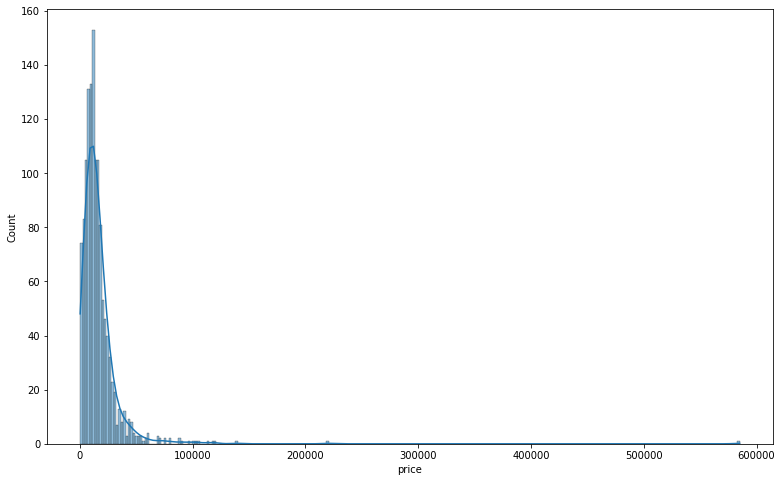

In [224]:
#### Univariate Analysis of Numeric Variables ####
numericfeature = df_final[['mileage','price','reg_code','public_reference']]
print(numericfeature.describe())
plt.figure(figsize=(13,8))
sns.histplot(df_final.price,kde=True)


        body_type fuel_type standard_make standard_colour vehicle_condition
count        1285      1285          1285            1285              1285
unique         10         7            40              18                 2
top     Hatchback    Petrol      Vauxhall           White              USED
freq          551       707           184             260              1207


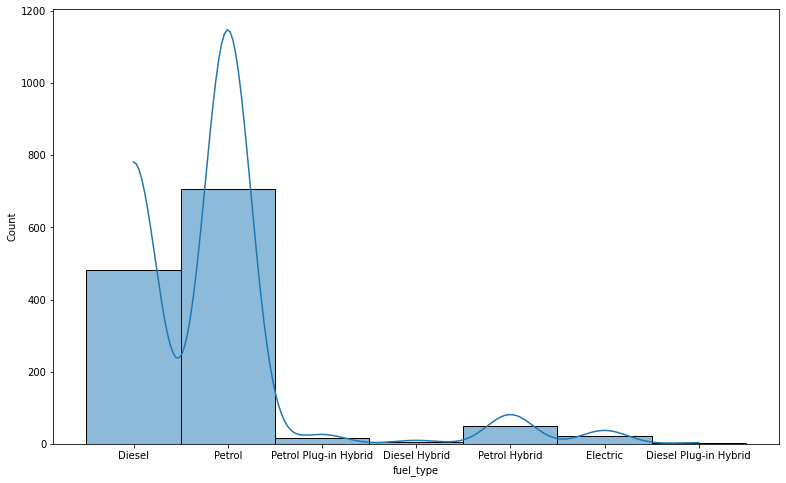

In [217]:
#### Univariate Analysis of Categorical Variables ####
categoricalfeature = df_final[['body_type','fuel_type','standard_make','standard_colour','vehicle_condition']]
print(categoricalfeature.describe())
plt.figure(figsize=(13,8))
sns.histplot(df_final.fuel_type,kde=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8e2f20520>]],
      dtype=object)

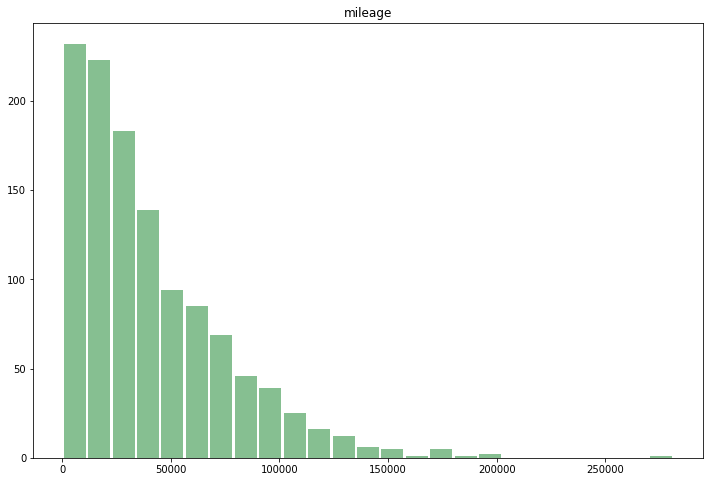

In [54]:
####Display Mileage of Cars #####
df_final.hist(column='mileage', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9,range=[30, 281500])

In [56]:
 #Number of unique values in each columns
for i in range(0, len(df_final.columns)):
     print(df_final.columns[i], ":", df_final.iloc[:,i].nunique())

public_reference : 1
mileage : 979
reg_code : 39
standard_colour : 18
standard_make : 40
standard_model : 214
vehicle_condition : 2
year_of_registration : 24
price : 860
body_type : 10
crossover_car_and_van : 2
fuel_type : 7


In [57]:
  #### Printing Duplicated Rows #####
duplicatedrows = df_final.duplicated().sum()
print('Duplicated Rows:',duplicatedrows)

Duplicated Rows: 0


In [58]:
#### Print Range of Mileage and Price Columns ####

print("Range:",max(df_final.mileage)-min(df_final.mileage))
print("Range:",max(df_final.price)-min(df_final.price))

Range: 281500
Range: 584701


In [59]:
df_final['price'].agg(['min', 'max'])

min       299
max    585000
Name: price, dtype: int64

In [60]:
''' Detection of Outliers in Mileage Column '''
# IQR
Q1 = np.percentile(df_final['mileage'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_final['mileage'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df_final.shape)

Old Shape:  (1285, 12)


In [61]:
# Upper bound
upper = np.where(df['mileage'] >= (Q3+1.5*IQR))
print("Upper bound:",upper)
print(np.where(upper))
# Lower bound
lower = np.where(df['mileage'] <= (Q1-1.5*IQR))
print("Lower bound:", lower)
print(np.where(lower)) 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df_final.shape)

Upper bound: (array([  32,   80,   86,  165,  187,  210,  214,  215,  256,  277,  280,
        342,  421,  426,  510,  649,  659,  662,  675,  784,  837,  891,
        922,  926,  955, 1009, 1178, 1180, 1199, 1258, 1281, 1290, 1293,
       1316, 1337, 1360, 1374, 1438, 1456, 1460, 1520, 1582, 1647, 1657,
       1658, 1733, 1801, 1809, 1815, 1897, 1968, 1995]),)
(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51]))
Lower bound: (array([], dtype=int64),)
(array([], dtype=int64), array([], dtype=int64))
New Shape:  (1285, 12)


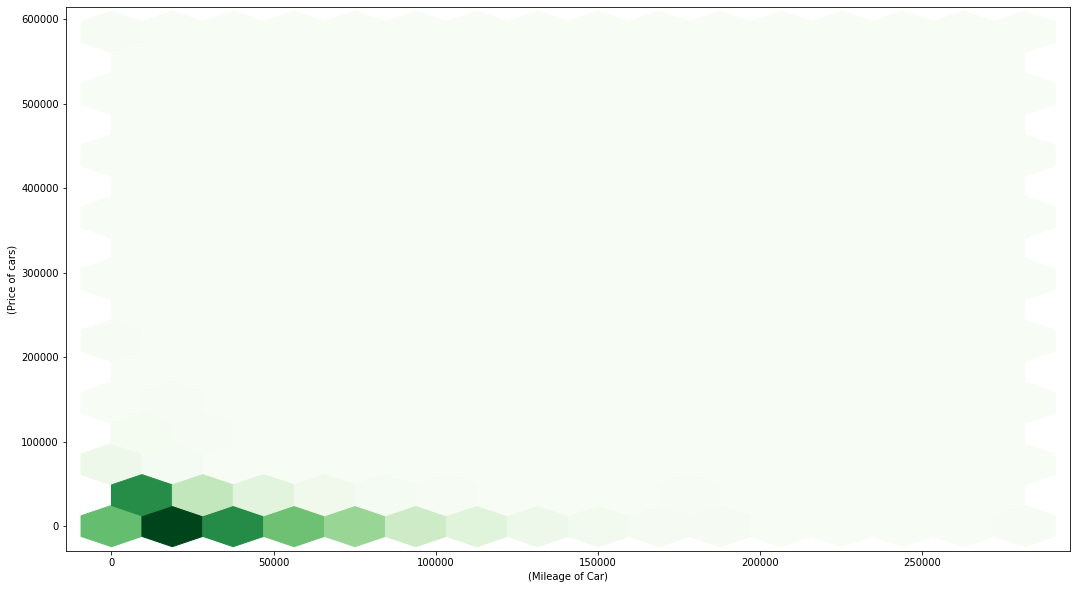

In [62]:
# Hexbin plot
fig, ax = plt.subplots(figsize = (18,10))
ax.hexbin(df_final['mileage'], df_final['price'],gridsize = 15, cmap ='Greens')
 
# x-axis label
ax.set_xlabel('(Mileage of Car)')
 
# y-axis label
ax.set_ylabel('(Price of cars)')
plt.show()

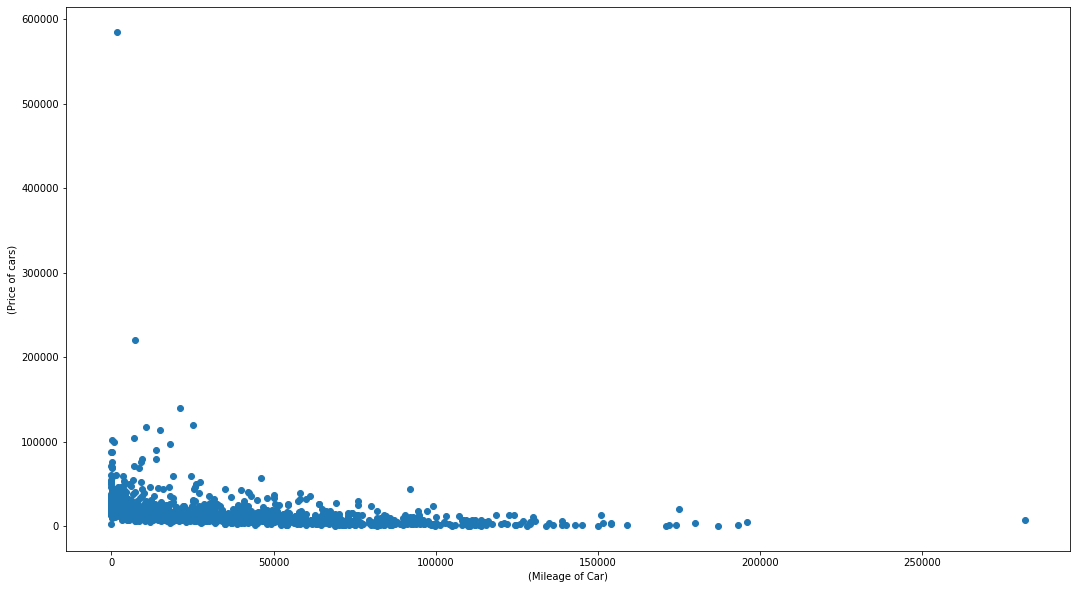

In [63]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df_final['mileage'], df_final['price'])
 
# x-axis label
ax.set_xlabel('(Mileage of Car)')
 
# y-axis label
ax.set_ylabel('(Price of cars)')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

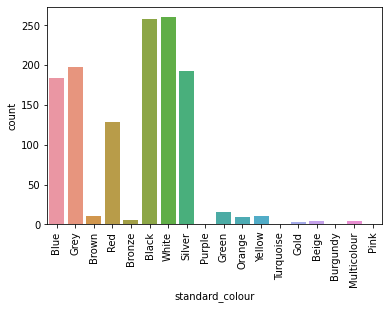

In [64]:
##### Count of cars according to Color #####
sns.countplot(x='standard_colour', data=df_final)
plt.xticks(rotation=90)

<Figure size 1800x432 with 0 Axes>

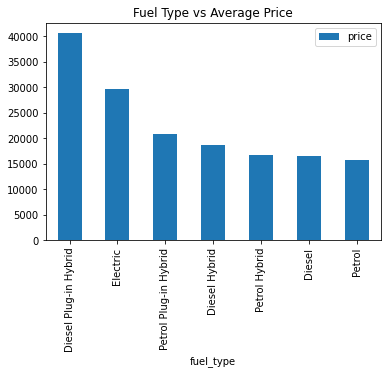

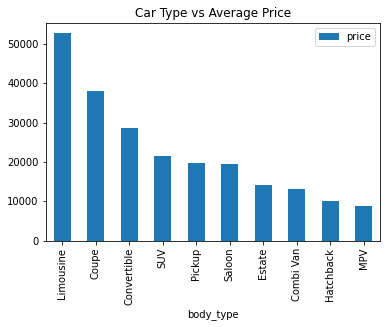

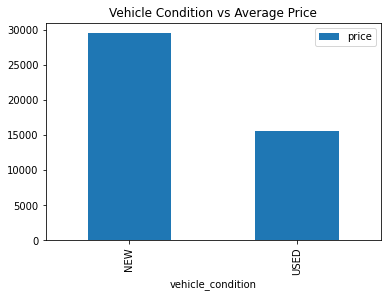

In [65]:
plt.figure(figsize=(25, 6))

dfnew = pd.DataFrame(df_final.groupby(['fuel_type'])['price'].mean().sort_values(ascending = False))
dfnew.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

dfnew = pd.DataFrame(df_final.groupby(['body_type'])['price'].mean().sort_values(ascending = False))
dfnew.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()


dfnew = pd.DataFrame(df_final.groupby(['vehicle_condition'])['price'].mean().sort_values(ascending = False))
dfnew.plot.bar()
plt.title('Vehicle Condition vs Average Price')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

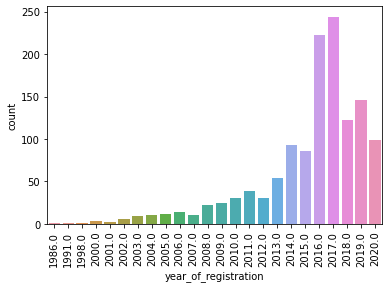

In [66]:
##### Count of cars according to Registered Year #####
sns.countplot(x='year_of_registration', data=df_final)
plt.xticks(rotation=90)

In [67]:
 ###### Separating Dependent and Independent Varaibles #######
X = df_final.drop(['price','standard_model'],axis = 1)
Y = df_final.drop(['public_reference',  'mileage',  'reg_code', 'standard_colour',  'standard_make','standard_model', 'vehicle_condition',  'year_of_registration', 'body_type','crossover_car_and_van','fuel_type'],axis = 1)
print('Independent Variables:',X)
print('Dependent Variables:',Y)

Independent Variables:       public_reference  mileage  reg_code standard_colour  standard_make  \
1         2.020000e+14   108230      61.0            Blue         Jaguar   
2         2.020000e+14     7800      17.0            Grey          SKODA   
3         2.020000e+14    45000      16.0           Brown       Vauxhall   
4         2.020000e+14    64000      64.0            Grey     Land Rover   
6         2.020000e+14    24075      17.0             Red       Vauxhall   
...                ...      ...       ...             ...            ...   
1995      2.020000e+14   122675      15.0            Grey  Mercedes-Benz   
1996      2.020000e+14    70000      17.0           Black       Vauxhall   
1997      2.020000e+14    65303      53.0          Silver        Porsche   
1998      2.020000e+14    72178      64.0           Brown       Vauxhall   
1999      2.020000e+14    81000      63.0           White          Dacia   

     vehicle_condition  year_of_registration    body_type  \
1  

In [68]:
###Check Median/Mean/Mode of Price Column ####
median = Y.median()
print('Median of Price:',median)
mean = Y.mean()
print('Mean of Price:',mean)
mode = Y.mode()
print('Mode of Price:',mode)

Median of Price: price    12595.0
dtype: float64
Mean of Price: price    16379.410895
dtype: float64
Mode of Price:    price
0   9995


In [69]:
# one hot encoding of Standard_colour of Car ####
pd.get_dummies(X['standard_colour']).head()

# for better visualisation
pd.concat([X['standard_colour'], pd.get_dummies(X['standard_colour'])], axis=1).head()


,standard_colour,Beige,Black,Blue,Bronze,Brown,Burgundy,Gold,Green,Grey,Multicolour,Orange,Pink,Purple,Red,Silver,Turquoise,White,Yellow
1,Blue,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Grey,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Brown,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Grey,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6,Red,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [70]:
# one hot encoding of Vehicle Condition of Car ####
pd.get_dummies(X['vehicle_condition']).head()

# for better visualisation
pd.concat([X['vehicle_condition'], pd.get_dummies(X['vehicle_condition'])], axis=1).head()

,vehicle_condition,NEW,USED
1,USED,0,1
2,USED,0,1
3,USED,0,1
4,USED,0,1
6,USED,0,1


In [71]:
# one hot encoding of Feul Type of Car ####
pd.get_dummies(X['fuel_type']).head()

# for better visualisation
pd.concat([X['fuel_type'], pd.get_dummies(X['fuel_type'])], axis=1).head()

,fuel_type,Diesel,Diesel Hybrid,Diesel Plug-in Hybrid,Electric,Petrol,Petrol Hybrid,Petrol Plug-in Hybrid
1,Diesel,1,0,0,0,0,0,0
2,Petrol,0,0,0,0,1,0,0
3,Diesel,1,0,0,0,0,0,0
4,Diesel,1,0,0,0,0,0,0
6,Petrol,0,0,0,0,1,0,0


In [72]:
# one hot encoding of Body Type of Car ####
pd.get_dummies(X['body_type']).head()

# for better visualisation
pd.concat([X['body_type'], pd.get_dummies(X['body_type'])], axis=1).head()

,body_type,Combi Van,Convertible,Coupe,Estate,Hatchback,Limousine,MPV,Pickup,SUV,Saloon
1,Saloon,0,0,0,0,0,0,0,0,0,1
2,SUV,0,0,0,0,0,0,0,0,1,0
3,Hatchback,0,0,0,0,1,0,0,0,0,0
4,SUV,0,0,0,0,0,0,0,0,1,0
6,Hatchback,0,0,0,0,1,0,0,0,0,0


In [73]:
###One hot Encoding of Multiple Columns ####
one_hot_encoded_data = pd.get_dummies(X, columns = ['body_type','fuel_type','standard_colour','vehicle_condition','standard_make'])
one_hot_encoded_data

,public_reference,mileage,reg_code,year_of_registration,crossover_car_and_van,body_type_Combi Van,body_type_Convertible,body_type_Coupe,body_type_Estate,body_type_Hatchback,...,standard_make_Rolls-Royce,standard_make_SEAT,standard_make_SKODA,standard_make_Smart,standard_make_SsangYong,standard_make_Subaru,standard_make_Suzuki,standard_make_Toyota,standard_make_Vauxhall,standard_make_Volkswagen
1,2.020000e+14,108230,61.0,2011.0,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.020000e+14,7800,17.0,2017.0,False,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2.020000e+14,45000,16.0,2016.0,False,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,2.020000e+14,64000,64.0,2015.0,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2.020000e+14,24075,17.0,2017.0,False,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2.020000e+14,122675,15.0,2015.0,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,2.020000e+14,70000,17.0,2017.0,False,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1997,2.020000e+14,65303,53.0,2003.0,False,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,2.020000e+14,72178,64.0,2014.0,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [74]:
 #####Feature Scaling #########
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(one_hot_encoded_data)
print(X_scaled)

[[0.         0.38447602 0.86764706 ... 0.         0.         0.        ]
 [0.         0.0277087  0.22058824 ... 0.         0.         0.        ]
 [0.         0.1598579  0.20588235 ... 0.         1.         0.        ]
 ...
 [0.         0.23198224 0.75       ... 0.         0.         0.        ]
 [0.         0.25640497 0.91176471 ... 0.         1.         0.        ]
 [0.         0.28774423 0.89705882 ... 0.         0.         0.        ]]


In [248]:
 ###### Splitting Dataset ##########
train_x,test_x,train_y,test_y = train_test_split(one_hot_encoded_data, Y, test_size = 0.3)
print('Training Independent_Variable Shape:',train_x)
print('\nTraining Dependent_Variable Shape:',train_y)
print('\nTesting Independent_Variable Shape:',test_x)
print('\nTesting Dependent_Variable Shape:',test_y)

Training Independent_Variable Shape:       public_reference  mileage  reg_code  year_of_registration  \
1066      2.020000e+14    22917      17.0                2017.0   
708       2.020000e+14    82454      15.0                2015.0   
1088      2.020000e+14    71837      61.0                2011.0   
1099      2.020000e+14   108125      61.0                2012.0   
1531      2.020000e+14    31274      17.0                2017.0   
...                ...      ...       ...                   ...   
1637      2.020000e+14    12023      66.0                2017.0   
1028      2.020000e+14    37985      17.0                2017.0   
630       2.020000e+14    54000      20.0                2019.0   
400       2.020000e+14   114000       4.0                2004.0   
1755      2.020000e+14    22988      18.0                2018.0   

      crossover_car_and_van  body_type_Combi Van  body_type_Convertible  \
1066                  False                    0                      0   
708     

In [166]:
dfactual = pd.DataFrame(test_y)
print(dfactual)

      price
896   11999
112   16500
1300  11990
553    2195
736    7650
...     ...
191   15690
80     3995
196    8595
1396  24990
403   11495

[386 rows x 1 columns]


In [76]:
# pearson's correlation feature selection for numeric input and numeric output
# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
X_selected = fs.fit_transform(one_hot_encoded_data, np.ravel(Y))
print(X_selected.shape)

(1285, 10)


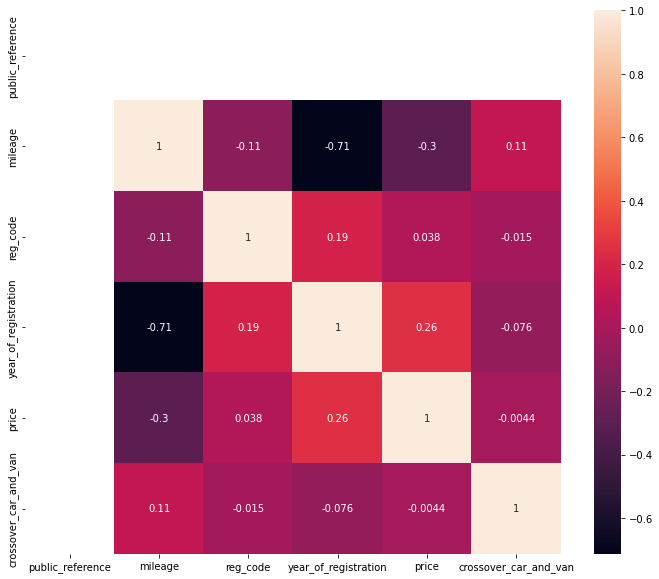

In [77]:
####Feature Selection #####
cor = df_final.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor,annot=True)

In [255]:
# Feature Importance
# Top 3 Best Features
bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(one_hot_encoded_data,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(one_hot_encoded_data.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(3,'Score'))  #print 3 best features

                    Specs         Score
1                 mileage  3.409951e+07
2                reg_code  1.373741e+04
51  standard_make_Ferrari  1.284000e+03


[0.         0.23065809 0.14109063 0.12931507 0.00130146 0.00026889
 0.00588595 0.00887204 0.01177757 0.01860049 0.0010644  0.00812599
 0.00100542 0.01361281 0.0101469  0.02321131 0.00170096 0.00074361
 0.00385414 0.02409317 0.00608151 0.0035196  0.00136729 0.02249914
 0.02137758 0.00174902 0.00237779 0.00023588 0.00079018 0.00465888
 0.01578114 0.00112575 0.00259661 0.00038784 0.00034438 0.01580755
 0.01733312 0.00040139 0.01943687 0.00384878 0.00451094 0.00455965
 0.00289672 0.00085734 0.00174322 0.00105162 0.00120728 0.00060368
 0.00706196 0.00040136 0.00034505 0.00040695 0.0015286  0.01159762
 0.00534538 0.00032523 0.00607298 0.00420615 0.01587874 0.00035282
 0.00752839 0.00144396 0.01258977 0.00096144 0.0004076  0.01257771
 0.00371738 0.01484404 0.00024158 0.00058128 0.00394769 0.01146853
 0.00084163 0.00962737 0.01482025 0.00151629 0.00139376 0.0014297
 0.00586116 0.00935057 0.0145455  0.02230191]


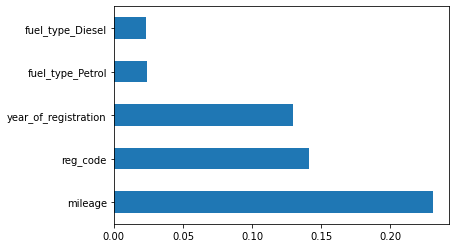

In [256]:
#### Feature Importance using Extratress classifier ####
model = ExtraTreesClassifier()
model.fit(one_hot_encoded_data,np.ravel(Y))
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=one_hot_encoded_data.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [80]:
lm = LinearRegression()
lm.fit(train_x,train_y)
rfe = RFE(lm,n_features_to_select=10, step=1)
rfe = rfe.fit(train_x, train_y)
rfe

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [81]:
list(zip(train_x.columns,rfe.support_,rfe.ranking_))

[('public_reference', False, 69),
 ('mileage', False, 68),
 ('reg_code', False, 66),
 ('year_of_registration', False, 49),
 ('crossover_car_and_van', False, 44),
 ('body_type_Combi Van', False, 64),
 ('body_type_Convertible', False, 53),
 ('body_type_Coupe', False, 52),
 ('body_type_Estate', False, 42),
 ('body_type_Hatchback', False, 34),
 ('body_type_Limousine', False, 10),
 ('body_type_MPV', False, 37),
 ('body_type_Pickup', True, 1),
 ('body_type_SUV', False, 54),
 ('body_type_Saloon', False, 40),
 ('fuel_type_Diesel', False, 35),
 ('fuel_type_Diesel Hybrid', False, 31),
 ('fuel_type_Diesel Plug-in Hybrid', True, 1),
 ('fuel_type_Electric', False, 2),
 ('fuel_type_Petrol', False, 36),
 ('fuel_type_Petrol Hybrid', False, 67),
 ('fuel_type_Petrol Plug-in Hybrid', False, 59),
 ('standard_colour_Beige', False, 58),
 ('standard_colour_Black', False, 55),
 ('standard_colour_Blue', False, 50),
 ('standard_colour_Bronze', False, 38),
 ('standard_colour_Brown', False, 63),
 ('standard_colou

In [82]:
train_x.columns[rfe.support_]

Index(['body_type_Pickup', 'fuel_type_Diesel Plug-in Hybrid',
       'standard_colour_Burgundy', 'vehicle_condition_NEW',
       'vehicle_condition_USED', 'standard_make_Aston Martin',
       'standard_make_Fiat', 'standard_make_Isuzu', 'standard_make_McLaren',
       'standard_make_Panther'],
      dtype='object')

In [83]:
train_x_rfe = train_x[train_x.columns[rfe.support_]]
train_x_rfe.head()

,body_type_Pickup,fuel_type_Diesel Plug-in Hybrid,standard_colour_Burgundy,vehicle_condition_NEW,vehicle_condition_USED,standard_make_Aston Martin,standard_make_Fiat,standard_make_Isuzu,standard_make_McLaren,standard_make_Panther
1172,0,0,0,0,1,0,0,0,0,0
1692,0,0,0,0,1,0,0,0,0,0
1008,0,0,0,0,1,0,0,0,0,0
1678,0,0,0,1,0,0,0,0,0,0
720,0,0,0,0,1,0,0,0,0,0


In [84]:
# Statsmodel api does not add a constant by default. We need to add it explicitly.
X_train = sm.add_constant(train_x)
# Add constant to test data
X_test = sm.add_constant(test_x)


def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(train_y["price"], train.astype(float))
    return olsmodel.fit()
#fit statmodel
olsmodel1 = build_ols_model(X_train)
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     121.5
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           2.01e-47
Time:                        10:10:17   Log-Likelihood:                -10191.
No. Observations:                 899   AIC:                         2.039e+04
Df Residuals:                     896   BIC:                         2.040e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
public_ref

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [85]:
cv=5 # CV value
r_2 = [] # List for r 2 score
CV = [] # list for CV scores mean

# Main function for models
def model(algorithm,train_x,train_y,test_x,test_y): 
    algorithm.fit(train_x,train_y)
    predicts=algorithm.predict(test_x)
    prediction=pd.DataFrame(predicts)
    R_2=r2_score(test_y,prediction)
    cross_val=cross_val_score(algorithm,train_x,train_y,cv=cv)
    
    # Appending results to Lists 
    r_2.append(R_2)
    CV.append(cross_val.mean())
    
    # Printing results  
    print(algorithm,"\n") 
    print("r_2 score :",R_2,"\n")
    print("CV scores:",cross_val,"\n")
    print("CV scores mean:",cross_val.mean())
    
    # Plot for prediction vs originals
    test_index=test_y.reset_index()["price"]
    ax=test_index.plot(label="originals",figsize=(12,6),linewidth=2,color="r")
    ax=prediction[0].plot(label = "predictions",figsize=(12,6),linewidth=2,color="g")
    plt.legend(loc='upper right')
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
    plt.show()

LinearRegression() 

r_2 score : 0.432593432381831 

CV scores: [0.07742638 0.57356507 0.47832985 0.63316488 0.45166405] 

CV scores mean: 0.4428300456459565


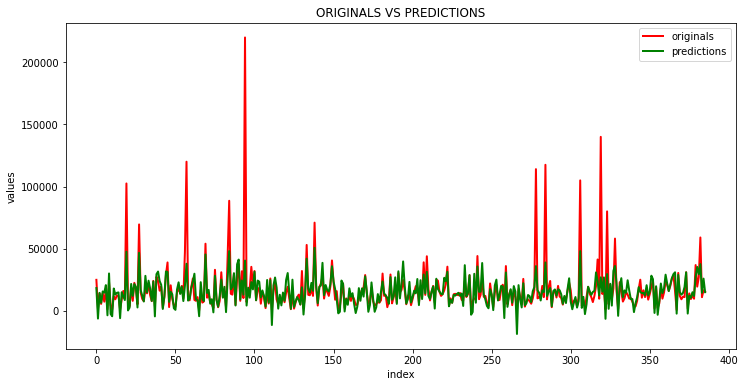

In [86]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model(lr,train_x,train_y,test_x,test_y)

In [87]:
from sklearn import linear_model
clf=linear_model.Lasso(alpha=0.015, fit_intercept=False, tol=0.00001,
          max_iter=10000, positive=True)
clf.fit(train_x,train_y)
alphas = np.logspace(-3,3,num=14) # range for alpha

grid = GridSearchCV(estimator=clf, param_grid=dict(alpha=alphas))
grid.fit(train_x, train_y)

print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.2751154191519789
14.251026703029993


In [88]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-3,3,num=14) # range for alpha

grid = GridSearchCV(estimator=Lasso(), param_grid=dict(alpha=alphas))
grid.fit(train_x, train_y)
predicts=grid.predict(test_x)
prediction=pd.DataFrame(predicts)
R_2=r2_score(test_y,prediction)
print(R_2)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.731e+09, tolerance: 1.251e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.543e+09, tolerance: 4.443e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.826e+09, tolerance: 4.354e+07

0.30136446612479484
0.4615868230915817
14.251026703029993


In [89]:
from sklearn.linear_model import Ridge

alphas = np.logspace(-3,3,num=14) # range for alpha

grid2 = GridSearchCV(estimator=Ridge(), param_grid=dict(alpha=alphas)) 
grid2.fit(train_x, train_y)

print(grid2.best_score_)
print(grid2.best_estimator_.alpha)

0.45480671071760465
0.2030917620904737


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

Ridge(alpha=0.01, normalize=True) 

r_2 score : 0.3147010772804367 

CV scores: [0.07429493 0.62493619 0.5005903  0.65643183 0.43287447] 

CV scores mean: 0.45782554449212204


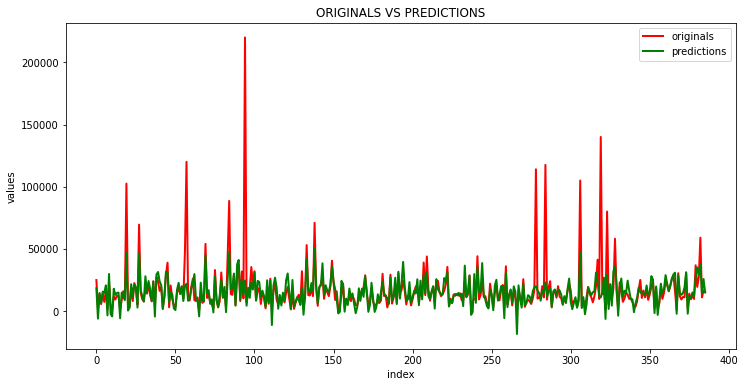

In [90]:
ridge = Ridge(alpha = 0.01, normalize = True) # applied the best estimator
model(ridge,train_x,train_y,test_x,test_y)

DecisionTreeRegressor() 

r_2 score : 0.22406568233873825 

CV scores: [0.10978407 0.46059563 0.49345929 0.64573047 0.30979775] 

CV scores mean: 0.40387344184961477


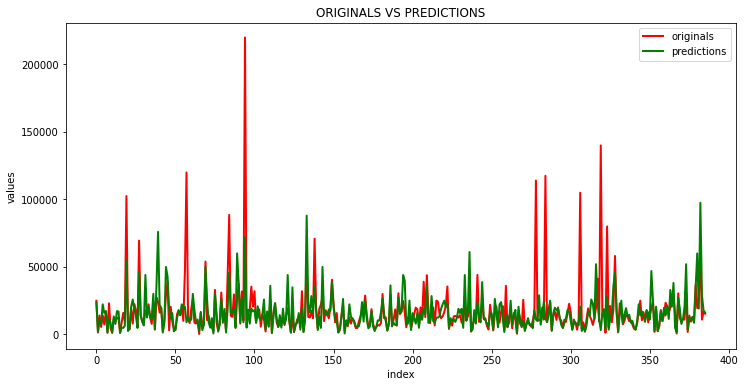

In [91]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
model(dtr,train_x,train_y,test_x,test_y)

<ipython-input-85-0f4d59b31cd4>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  algorithm.fit(train_x,train_y)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sampl

RandomForestRegressor(random_state=42) 

r_2 score : 0.32005907714593873 

CV scores: [0.12451487 0.66125216 0.60236576 0.70453484 0.52914352] 

CV scores mean: 0.5243622313294207


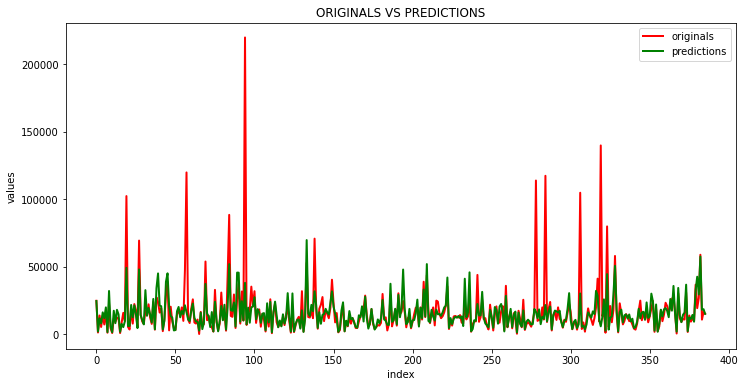

In [92]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
model(rf,train_x,train_y,test_x,test_y)

In [171]:
from sklearn.metrics import confusion_matrix
#Create a LinearRegression object
lr= LinearRegression()
#Fit X and y 
lr.fit(train_x, train_y)
ypred = lr.predict(test_x)
dfpred = pd.DataFrame(ypred,columns=['PredictedPrice'])
dfpred

,PredictedPrice
0,17346.221548
1,29422.222924
2,18946.056932
3,-1106.043811
4,7170.850076
...,...
381,20720.732419
382,169.510630
383,11099.746047
384,19752.861316


In [249]:
#### Course Grained Model Evaluation ####
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
#Create a LinearRegression object
lr= LinearRegression()
#Fit X and y 
lr.fit(train_x, train_y)
ypred = lr.predict(test_x)
dfnew = pd.DataFrame(ypred,columns=['Price'])
dfnew
#dfnew = pd.DataFrame({'Actual': test_y.values.flatten(), 'Predicted': ypred})
#Metrics to evaluate your model 
print("R_Square:",r2_score(test_y, ypred))
print("Mean_Absolute_Error:",mean_absolute_error(test_y, ypred))
print("Mean_Squared_Error:",np.sqrt(mean_squared_error(test_y, ypred)))


R_Square: 0.5003025223382767
Mean_Absolute_Error: 5474.395725667361
Mean_Squared_Error: 12513.265790458549


In [253]:
##### Fine Grained Model Evaluation ####
import statsmodels.api as sm
X_new = sm.add_constant(one_hot_encoded_data)
print(X_new)
results = sm.OLS(Y, X_new.astype(float)).fit()
testing = np.identity(len(results.params))
testing = testing[1:,:]
print(results.f_test(testing))
print(results.summary())

      public_reference  mileage  reg_code  year_of_registration  \
1         2.020000e+14   108230      61.0                2011.0   
2         2.020000e+14     7800      17.0                2017.0   
3         2.020000e+14    45000      16.0                2016.0   
4         2.020000e+14    64000      64.0                2015.0   
6         2.020000e+14    24075      17.0                2017.0   
...                ...      ...       ...                   ...   
1995      2.020000e+14   122675      15.0                2015.0   
1996      2.020000e+14    70000      17.0                2017.0   
1997      2.020000e+14    65303      53.0                2003.0   
1998      2.020000e+14    72178      64.0                2014.0   
1999      2.020000e+14    81000      63.0                2013.0   

      crossover_car_and_van  body_type_Combi Van  body_type_Convertible  \
1                     False                    0                      0   
2                     False                  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 81, but rank is 21
  warnings.warn('covariance of constraints does not have full '


In [ ]:
### Decision Tree Regressor ###
dt = DecisionTreeRegressor()
dt.fit(X_train, train_y)
yhat = dt.predict(X_test)
r2_score(test_y, yhat), mean_absolute_error(test_y, yhat), np.sqrt(mean_squared_error(test_y, yhat))

(0.4695774627659044, 5991.191709844559, 10364.194065230622)